# EDA: flights_sample_3m.csv

This notebook provides an in-depth exploratory data analysis (EDA) workflow for `flights_sample_3m.csv`.

Follow the cells sequentially. Start by activating your virtual environment in the integrated terminal, then run the install cell if packages are missing, and execute each analysis cell interactively.

Sections:
1. Create Jupyter Notebook & Kernel in Virtual Env
2. Install and Import Libraries
3. Load Dataset
4. Initial Data Inspection
5. Data Types & Type Conversions
6. Missing Values Analysis & Imputation
7. Duplicate and Index Handling
8. Univariate Analysis (Numerical)
9. Univariate Analysis (Categorical)
10. Outlier Detection & Treatment
11. Bivariate Analysis (Numeric vs Numeric)
12. Bivariate Analysis (Categorical vs Numeric)
13. Correlation Matrix & Feature Relationships
14. Feature Engineering & Encoding
15. Scaling & Transformation
16. Dimensionality Reduction (PCA / t-SNE)
17. Segmented Analysis / Grouped Aggregations
18. Save Cleaned Dataset & Export Artifacts
19. Quick Baseline Model for EDA Insights
20. Notebook Tests & Reproducibility Checks

---

Notes:
- This notebook assumes the CSV file `flights_sample_3m.csv` is in the same folder as this notebook. Adjust the path in the load cell if needed.
- If your virtual environment isn't registered as a Jupyter kernel, follow the commands in Section 1.



## 1) Create Jupyter Kernel in Virtual Environment

Open the integrated terminal in VS Code and run the following (example for `venv` or `python -m venv .venv`):

- Activate venv (macOS / zsh):

```bash
source .venv/bin/activate
```

- Install ipykernel and register the kernel:

```bash
pip install ipykernel
python -m ipykernel install --user --name=flights-venv --display-name "Flights venv"
```

- After running the above, select the kernel named "Flights venv" from the top-right kernel picker in VS Code notebook UI.

Run the next cells to install libraries and begin EDA.



In [1]:
# Install required packages if missing (runs in notebook kernel). Uncomment pip lines if you want to force install.
import sys
import subprocess
import json

required = [
    "pandas>=1.3",
    "numpy",
    "matplotlib",
    "seaborn",
    "plotly",
    "scikit-learn",
    "missingno",
    "ydata-profiling>=4.1"
]

missing = []
for pkg in required:
    name = pkg.split("<")[0].split("=")[0]
    try:
        __import__(name)
    except Exception:
        missing.append(pkg)

if missing:
    print("Missing packages detected:", missing)
    print("Installing missing packages. This may take a few minutes...")
    subprocess.check_call([sys.executable, "-m", "pip", "install", *missing])
else:
    print("All required packages appear installed.")

# Reproducibility info
import platform
print("Python:", sys.version.replace('\n',''))
print("Platform:", platform.platform())

# Versions
import pandas as pd, numpy as np, matplotlib as mpl, seaborn as sns
print("pandas:", pd.__version__)
print("numpy:", np.__version__)
print("matplotlib:", mpl.__version__)
print("seaborn:", sns.__version__)


Missing packages detected: ['pandas>=1.3', 'plotly', 'scikit-learn', 'missingno', 'ydata-profiling>=4.1']
Installing missing packages. This may take a few minutes...
  Using cached plotly-6.3.1-py3-none-any.whl.metadata (8.5 kB)
  Using cached missingno-0.5.2-py3-none-any.whl.metadata (639 bytes)
  Using cached ydata_profiling-4.17.0-py2.py3-none-any.whl.metadata (22 kB)
  Using cached narwhals-2.7.0-py3-none-any.whl.metadata (11 kB)
  Using cached scipy-1.15.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached matplotlib-3.10.0-cp313-cp313-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pydantic-2.12.0-py3-none-any.whl.metadata (83 kB)
  Using cached visions-0.8.1-py3-none-any.whl.metadata (11 kB)
  Using cached numpy-2.1.3-cp313-cp313-macosx_14_0_arm64.whl.metadata (62 kB)
  Using cached minify_html-0.16.4-cp313-cp313-macosx_11_0_arm64.whl.metadata (18 kB)
  Using cached filetype-1.2.0-py2.py3-none-any.whl.metadata (6.5 kB)
  Using cached phik-0.12.5-cp313-cp313-

In [3]:
# Imports and display settings
import os
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px

sns.set(style="whitegrid")
%matplotlib inline

# Useful display settings
pd.options.display.max_columns = 50
pd.options.display.max_rows = 100
pd.options.display.float_format = '{:,.3f}'.format


In [4]:
# 3) Load dataset
DATA_PATH = Path("./flights_sample_3m.csv")
print("Dataset path:", DATA_PATH.resolve())
print("Exists:", DATA_PATH.exists())

# Print file size
if DATA_PATH.exists():
    size_mb = DATA_PATH.stat().st_size / (1024*1024)
    print(f"File size: {size_mb:.2f} MB")

# Try to read with pandas; if memory error occurs, show chunked loading example
try:
    df = pd.read_csv(DATA_PATH)
    print("Loaded dataframe with shape:", df.shape)
except MemoryError:
    print("MemoryError reading file; attempting chunked reading...")
    chunks = []
    for chunk in pd.read_csv(DATA_PATH, chunksize=200_000):
        chunks.append(chunk)
    df = pd.concat(chunks, ignore_index=True)
    print("Loaded dataframe with chunking; shape:", df.shape)

# Quick peek
print('\nColumns and dtypes:')
print(df.dtypes)

print('\nFirst 5 rows:')
df.head()


Dataset path: /Users/kshitijmishra/Data-Science-Capstone/flights_sample_3m.csv
Exists: True
File size: 585.69 MB
Loaded dataframe with shape: (3000000, 32)

Columns and dtypes:
FL_DATE                     object
AIRLINE                     object
AIRLINE_DOT                 object
AIRLINE_CODE                object
DOT_CODE                     int64
FL_NUMBER                    int64
ORIGIN                      object
ORIGIN_CITY                 object
DEST                        object
DEST_CITY                   object
CRS_DEP_TIME                 int64
DEP_TIME                   float64
DEP_DELAY                  float64
TAXI_OUT                   float64
WHEELS_OFF                 float64
WHEELS_ON                  float64
TAXI_IN                    float64
CRS_ARR_TIME                 int64
ARR_TIME                   float64
ARR_DELAY                  float64
CANCELLED                  float64
CANCELLATION_CODE           object
DIVERTED                   float64
CRS_ELAPSED_TIME  

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,"1,151.000",-4.000,19.000,"1,210.000","1,443.000",4.000,1501,"1,447.000",-14.000,0.000,NaN,0.000,186.000,176.000,153.000,"1,065.000",NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,"2,114.000",-6.000,9.000,"2,123.000","2,232.000",38.000,2315,"2,310.000",-5.000,0.000,NaN,0.000,235.000,236.000,189.000,"1,399.000",NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,"1,000.000",6.000,20.000,"1,020.000","1,247.000",5.000,1252,"1,252.000",0.000,0.000,NaN,0.000,118.000,112.000,87.000,680.000,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,"1,608.000",-1.000,27.000,"1,635.000","1,844.000",9.000,1829,"1,853.000",24.000,0.000,NaN,0.000,260.000,285.000,249.000,"1,589.000",0.000,0.000,24.000,0.000,0.000
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,"1,838.000",-2.000,15.000,"1,853.000","2,026.000",14.000,2041,"2,040.000",-1.000,0.000,NaN,0.000,181.000,182.000,153.000,985.000,NaN,NaN,NaN,NaN,NaN


In [6]:
# 4) Initial Data Inspection
print('Shape:', df.shape)
print('\nInfo:')
print(df.info(memory_usage='deep'))

print('\nDescribe (numeric):')
df.describe(include=[np.number]).T

print('\nDescribe (object/categorical):')
df.describe(include=['object', 'category']).T

# Memory usage by column
mem = df.memory_usage(deep=True).sort_values(ascending=False)
print('\nTop memory using columns:')
print(mem.head(20))

# Unique counts per column (helpful to detect IDs)
unique_counts = df.nunique(dropna=False).sort_values()
print('\nUnique value counts (ascending):')
print(unique_counts.head(30))

# Show random sample rows
print('\nRandom sample:')
df.sample(5, random_state=42)


Shape: (3000000, 32)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 32 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   FL_DATE                  object 
 1   AIRLINE                  object 
 2   AIRLINE_DOT              object 
 3   AIRLINE_CODE             object 
 4   DOT_CODE                 int64  
 5   FL_NUMBER                int64  
 6   ORIGIN                   object 
 7   ORIGIN_CITY              object 
 8   DEST                     object 
 9   DEST_CITY                object 
 10  CRS_DEP_TIME             int64  
 11  DEP_TIME                 float64
 12  DEP_DELAY                float64
 13  TAXI_OUT                 float64
 14  WHEELS_OFF               float64
 15  WHEELS_ON                float64
 16  TAXI_IN                  float64
 17  CRS_ARR_TIME             int64  
 18  ARR_TIME                 float64
 19  ARR_DELAY                float64
 20  CANCELLED         

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
2945667,2021-05-04,JetBlue Airways,JetBlue Airways: B6,B6,20409,384,MCO,"Orlando, FL",JFK,"New York, NY",1551,"1,558.000",7.000,15.000,"1,613.000","1,822.000",8.000,1830,"1,830.000",0.000,0.000,NaN,0.000,159.000,152.000,129.000,944.000,NaN,NaN,NaN,NaN,NaN
2352586,2019-11-26,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,705,FLL,"Fort Lauderdale, FL",DTW,"Detroit, MI",800,755.000,-5.000,15.000,810.000,"1,040.000",4.000,1100,"1,044.000",-16.000,0.000,NaN,0.000,180.000,169.000,150.000,"1,127.000",NaN,NaN,NaN,NaN,NaN
1531260,2023-06-18,Southwest Airlines Co.,Southwest Airlines Co.: WN,WN,19393,1926,SMF,"Sacramento, CA",LAS,"Las Vegas, NV",2155,"2,151.000",-4.000,10.000,"2,201.000","2,300.000",4.000,2315,"2,304.000",-11.000,0.000,NaN,0.000,80.000,73.000,59.000,397.000,NaN,NaN,NaN,NaN,NaN
941910,2019-07-28,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4459,OKC,"Oklahoma City, OK",DTW,"Detroit, MI",550,546.000,-4.000,11.000,557.000,859.000,8.000,924,907.000,-17.000,0.000,NaN,0.000,154.000,141.000,122.000,900.000,NaN,NaN,NaN,NaN,NaN
2582125,2023-03-17,JetBlue Airways,JetBlue Airways: B6,B6,20409,277,FLL,"Fort Lauderdale, FL",SFO,"San Francisco, CA",2049,"2,049.000",0.000,21.000,"2,110.000",24.000,7.000,13,31.000,18.000,0.000,NaN,0.000,384.000,402.000,374.000,"2,584.000",0.000,0.000,18.000,0.000,0.000


Possible date/time columns: ['FL_DATE', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME']
Converted FL_DATE to datetime; nulls after convert: 0
Converted CRS_DEP_TIME to datetime; nulls after convert: 0
Converted DEP_TIME to datetime; nulls after convert: 77615
Converted CRS_ARR_TIME to datetime; nulls after convert: 0
Converted ARR_TIME to datetime; nulls after convert: 79942
Converted CRS_ELAPSED_TIME to datetime; nulls after convert: 14
Converted ELAPSED_TIME to datetime; nulls after convert: 86198
Converted AIR_TIME to datetime; nulls after convert: 86198

Dtypes after conversions:
FL_DATE                    datetime64[ns]
AIRLINE                            object
AIRLINE_DOT                        object
AIRLINE_CODE                       object
DOT_CODE                            int64
FL_NUMBER                           int64
ORIGIN                             object
ORIGIN_CITY                        object
DEST             

ValueError: array length 10 does not match index length 3000000

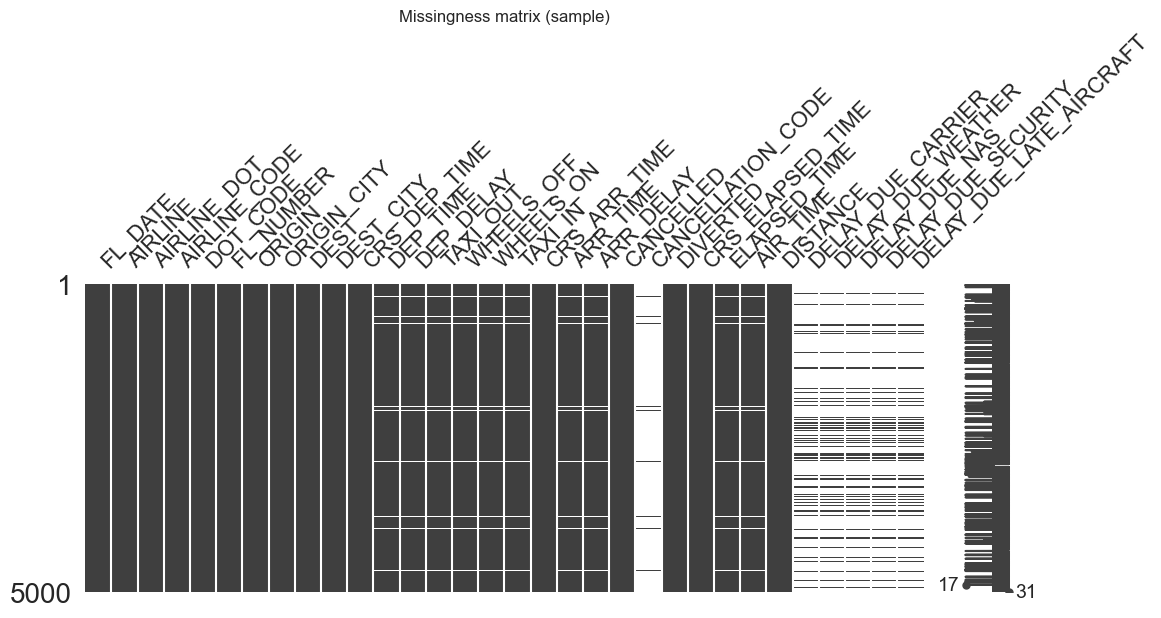

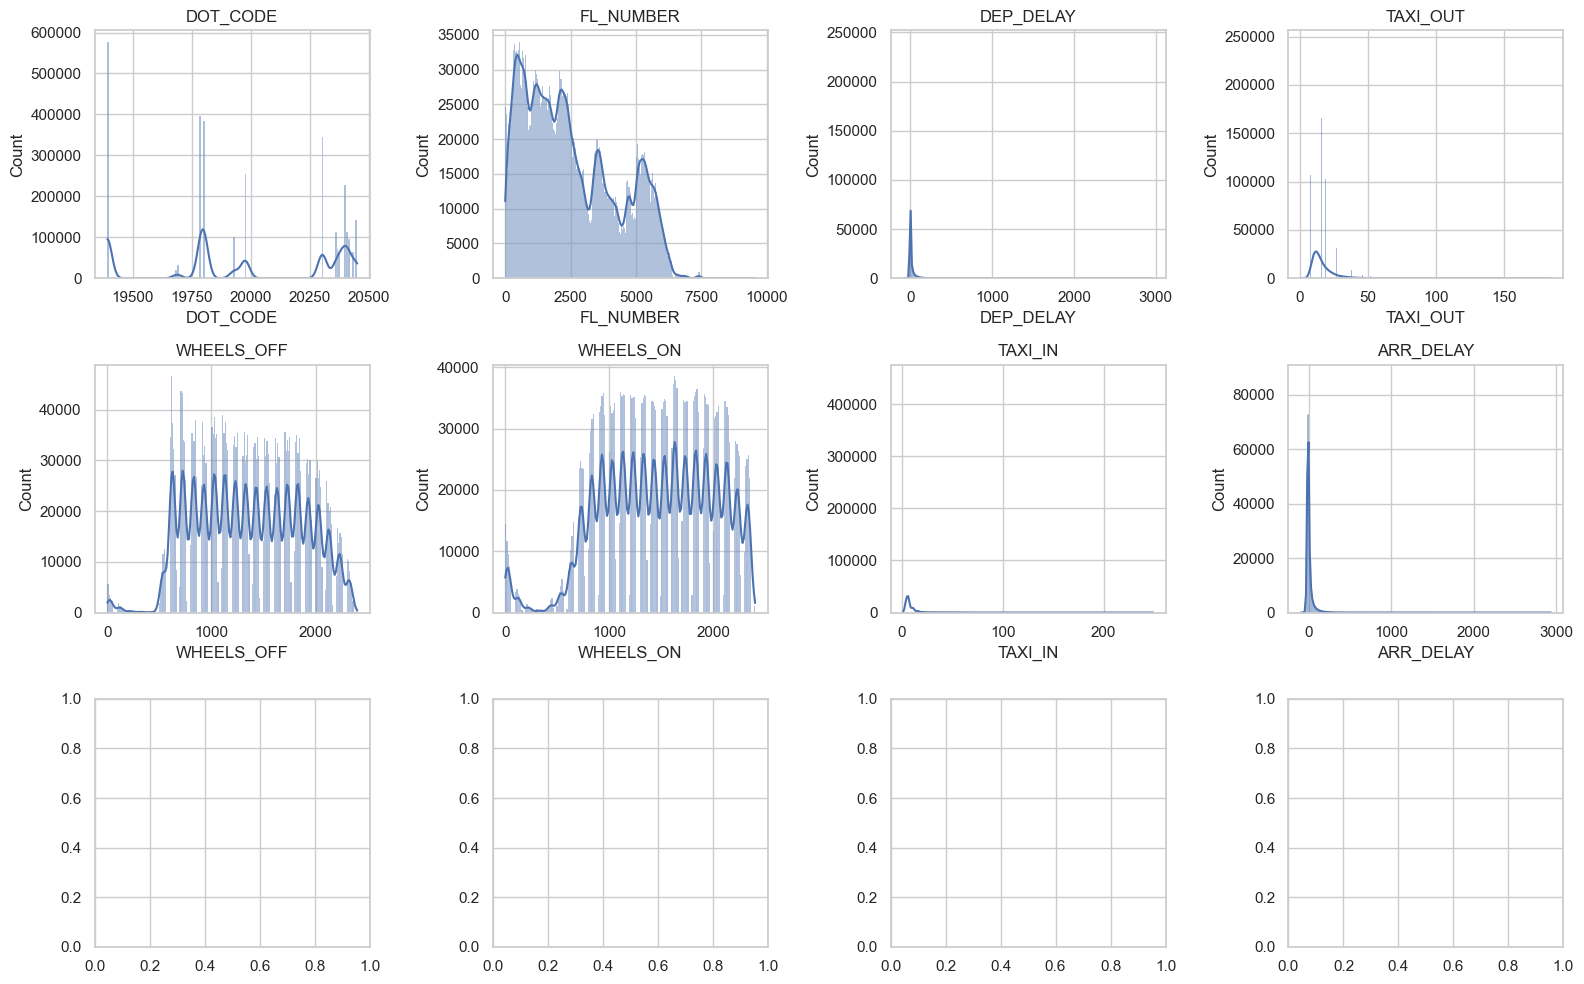

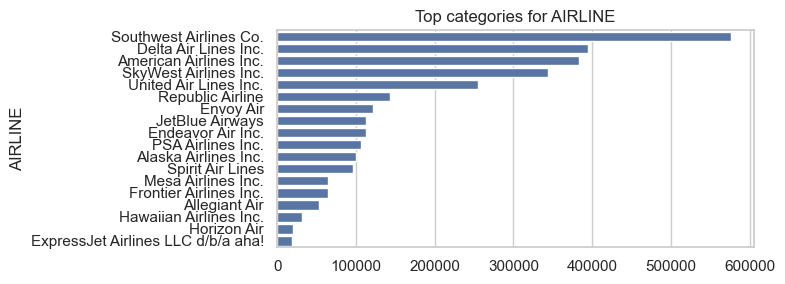

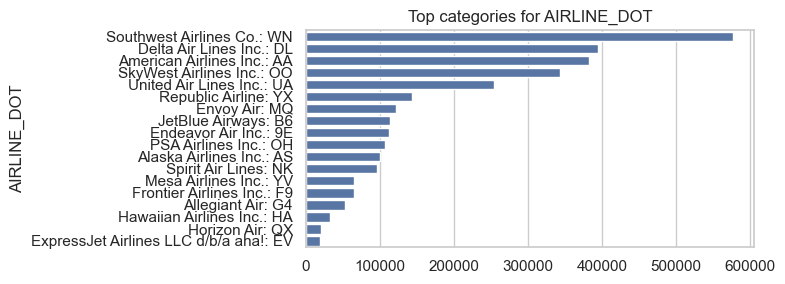

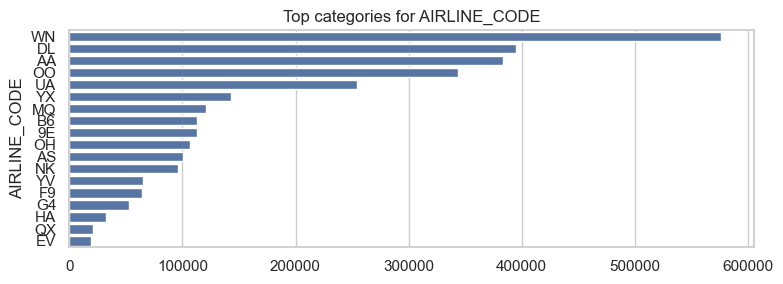

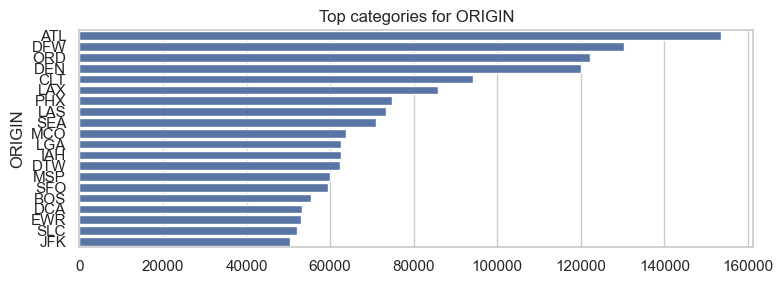

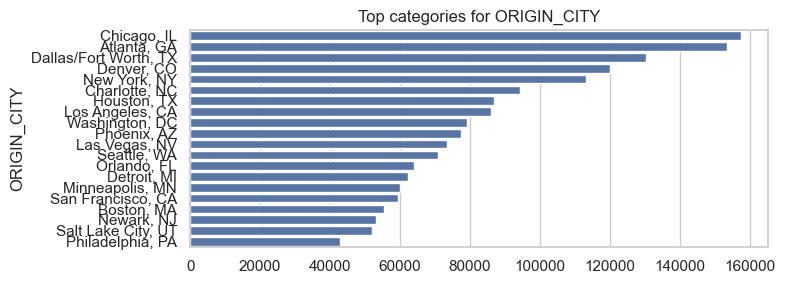

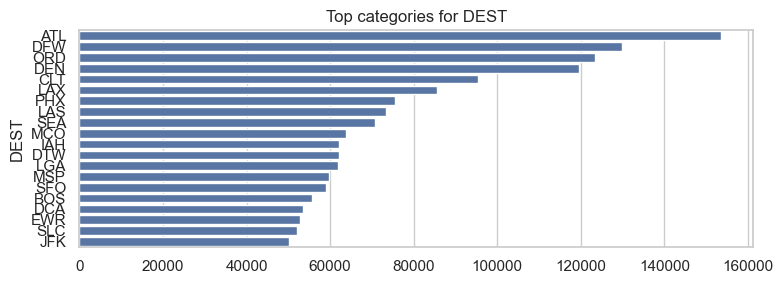

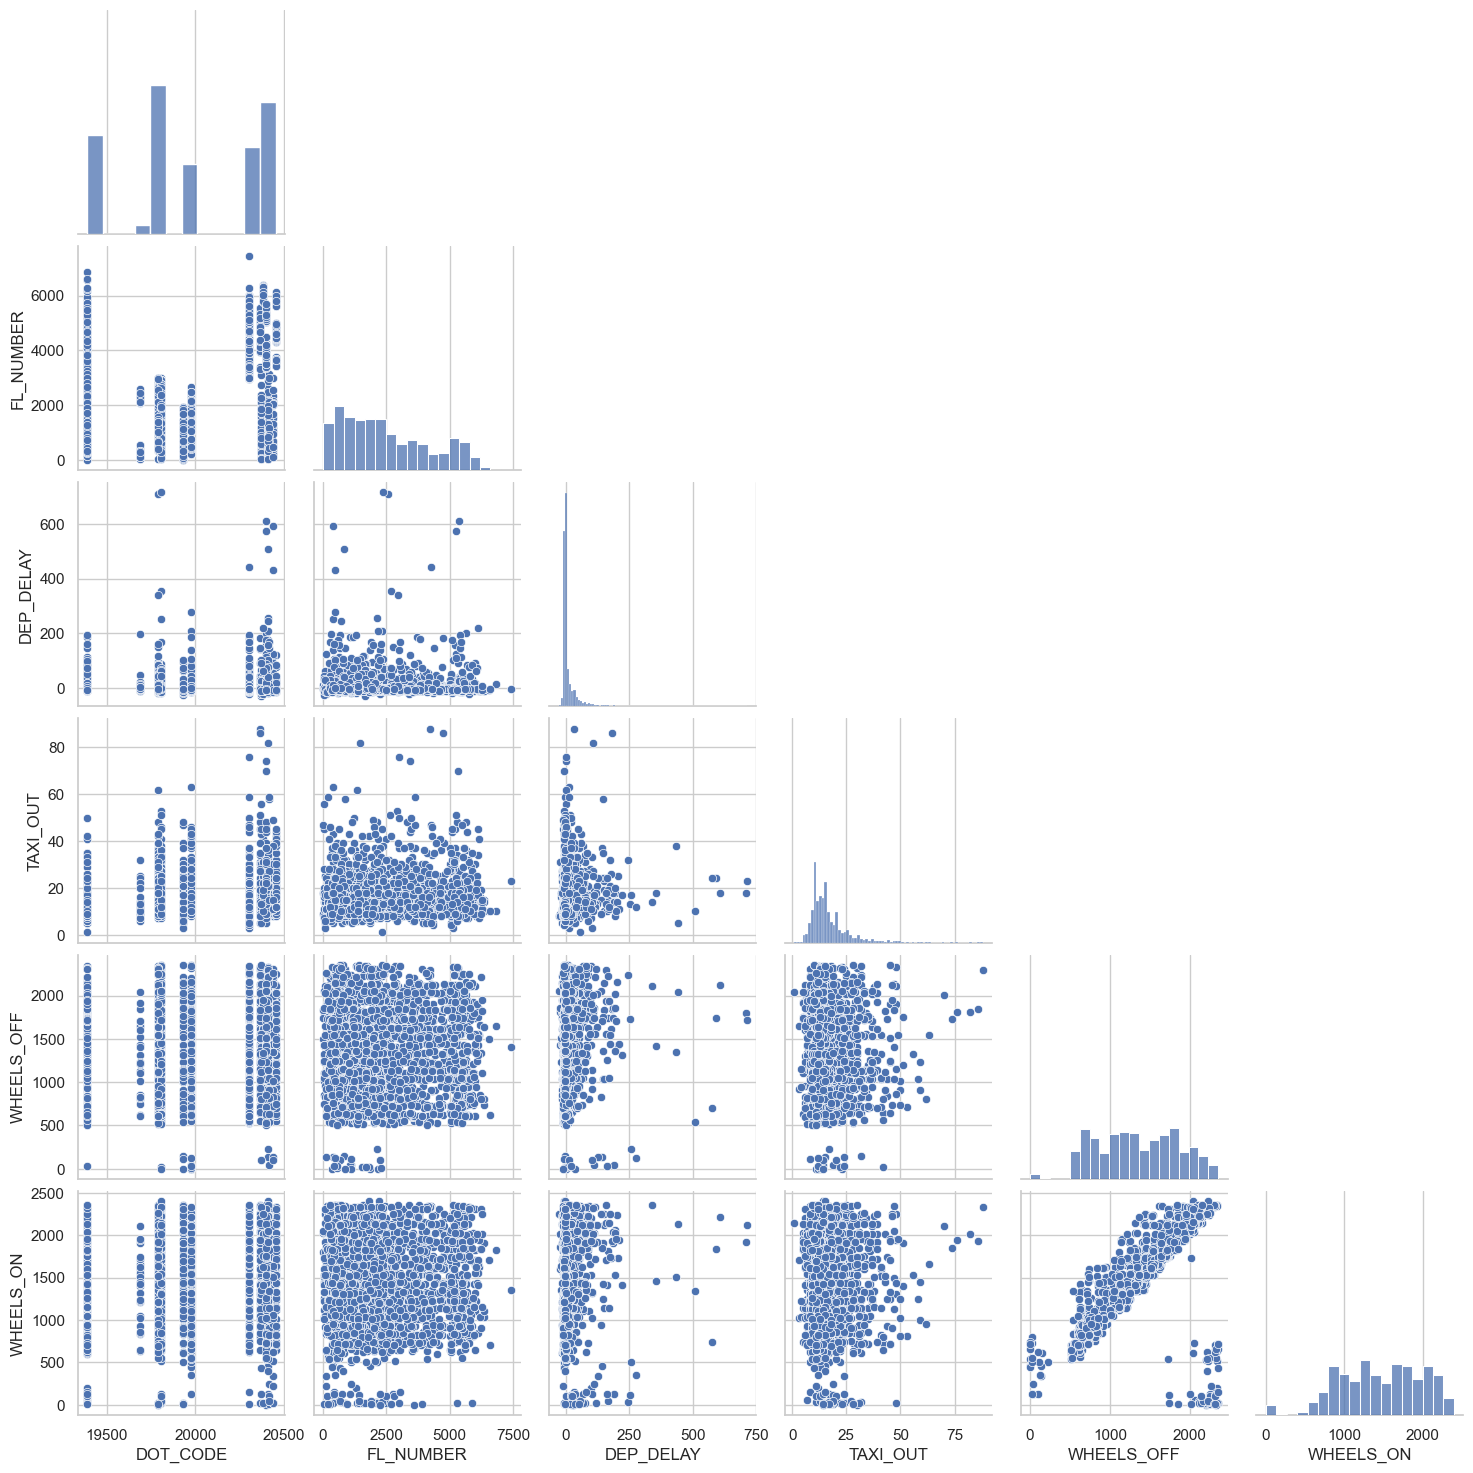

<Figure size 1000x500 with 0 Axes>

In [5]:
# 5) Data Types & Type Conversions
# Heuristics to detect datetime columns
possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
print('Possible date/time columns:', possible_date_cols)

# Try converting common columns to datetime safely
for c in possible_date_cols:
    try:
        df[c] = pd.to_datetime(df[c], errors='coerce')
        print(f'Converted {c} to datetime; nulls after convert:', df[c].isna().sum())
    except Exception as e:
        print('Could not convert', c, e)

# Convert numeric-like object columns
for c in df.select_dtypes(include=['object']).columns:
    try:
        df[c+'_num'] = pd.to_numeric(df[c], errors='coerce')
        # If conversion yields many non-nulls, keep and maybe replace
        non_null = df[c+'_num'].notna().sum()
        if non_null / len(df) < 0.1:
            df.drop(columns=[c+'_num'], inplace=True)
        else:
            print(f'Created numeric column from {c}: {non_null} non-nulls')
    except Exception:
        pass

# Show dtypes after conversions
print('\nDtypes after conversions:')
print(df.dtypes)


# 6) Missing Values Analysis & Imputation
missing = df.isna().sum().sort_values(ascending=False)
missing_percent = (missing / len(df) * 100).round(2)
missing_df = pd.concat([missing, missing_percent], axis=1)
missing_df.columns = ['missing_count', 'missing_percent']
missing_df[missing_df['missing_count']>0].head(50)

# Visualize missingness for top columns
msno.matrix(df.sample(min(5000, len(df))), figsize=(12,4))
plt.title('Missingness matrix (sample)')

# Example imputation: numeric median, categorical mode
from sklearn.impute import SimpleImputer
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cat_cols = df.select_dtypes(include=['object','category']).columns.tolist()

print('Number numeric columns:', len(num_cols))
print('Number categorical columns:', len(cat_cols))

# Create a small imputed sample (not modifying original df yet)
num_imp = SimpleImputer(strategy='median')
if num_cols:
    df_num_imp = pd.DataFrame(num_imp.fit_transform(df[num_cols]), columns=num_cols)

# 7) Duplicate and Index Handling
dup_count = df.duplicated().sum()
print('Duplicate rows:', dup_count)

# Option: create unique id if none
if 'id' not in df.columns and 'ID' not in df.columns:
    df['_row_id'] = range(1, len(df)+1)
    print('Added _row_id as unique identifier')

# Set datetime index if available
dt_cols = df.select_dtypes(include=['datetime']).columns.tolist()
if dt_cols:
    df = df.sort_values(by=dt_cols[0]).set_index(dt_cols[0])
    print('Set index to', dt_cols[0])

# 8) Univariate Analysis (Numerical)
import os
os.makedirs('eda_outputs', exist_ok=True)

numeric_summary = df.select_dtypes(include=[np.number]).describe().T
numeric_summary['skew'] = df.select_dtypes(include=[np.number]).skew()
numeric_summary['kurt'] = df.select_dtypes(include=[np.number]).kurt()
numeric_summary.head(20)

# Plot histograms for top numeric cols
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plot_cols = num_cols[:8]
fig, axes = plt.subplots(len(plot_cols)//4 + 1, 4, figsize=(16, 10))
axes = axes.flatten()
for i, c in enumerate(plot_cols):
    sns.histplot(df[c].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(c)
plt.tight_layout()
plt.savefig('eda_outputs/numeric_histograms.png')

# 9) Univariate Analysis (Categorical)
for c in cat_cols[:6]:
    vc = df[c].value_counts(dropna=False).head(20)
    print('\nColumn:', c)
    print(vc)
    plt.figure(figsize=(8,3))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f'Top categories for {c}')
    plt.tight_layout()
    plt.savefig(f'eda_outputs/cat_{c}_top20.png')

# 10) Outlier Detection & Treatment (IQR example)
from scipy import stats
for c in plot_cols:
    if df[c].dropna().shape[0] > 0:
        q1 = df[c].quantile(0.25)
        q3 = df[c].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outliers = df[(df[c] < lower) | (df[c] > upper)][c]
        print(f'Column {c}: outliers count =', outliers.shape[0])

# 11) Bivariate Analysis (Numeric vs Numeric)
if len(num_cols) >= 2:
    sns.pairplot(df[num_cols[:6]].dropna().sample(min(2000, len(df))), corner=True)
    plt.savefig('eda_outputs/pairplot.png')

# 12) Bivariate Analysis (Categorical vs Numeric)
if cat_cols and num_cols:
    c = cat_cols[0]
    n = num_cols[0]
    plt.figure(figsize=(10,5))
    sns.boxplot(x=df[c].astype(str).value_counts().index[:10], y=df[n])

# 13) Correlation Matrix & Feature Relationships
corr = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='RdBu_r', center=0)
plt.title('Correlation matrix')
plt.savefig('eda_outputs/correlation_matrix.png')

# VIF example for numeric features (subset)
from statsmodels.stats.outliers_influence import variance_inflation_factor
num_subset = df.select_dtypes(include=[np.number]).dropna().iloc[:, :10]
X = num_subset.values
vif = pd.DataFrame()
vif['feature'] = num_subset.columns
vif['VIF'] = [variance_inflation_factor(X, i) for i in range(X.shape[1])]
vif

# 14) Feature Engineering & Encoding (examples)
if 'distance' in df.columns and 'air_time' in df.columns:
    df['speed_mph'] = df['distance'] / (df['air_time'] / 60)

# Simple one-hot for small-cardinality categoricals
small_cat = [c for c in cat_cols if df[c].nunique() < 10]
if small_cat:
    df = pd.get_dummies(df, columns=small_cat, dummy_na=True)

# 15) Scaling & Transformation (example)
from sklearn.preprocessing import StandardScaler, PowerTransformer
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if num_cols:
    scaler = StandardScaler()
    df_scaled_sample = pd.DataFrame(scaler.fit_transform(df[num_cols].fillna(0)), columns=num_cols).iloc[:100]

# 16) Dimensionality Reduction (PCA example)
from sklearn.decomposition import PCA
if df_scaled_sample.shape[0] >= 10 and df_scaled_sample.shape[1] >= 2:
    pca = PCA(n_components=2)
    emb = pca.fit_transform(df_scaled_sample)
    plt.figure(figsize=(6,5))
    plt.scatter(emb[:,0], emb[:,1], s=10)
    plt.title('PCA 2D embedding (sample)')
    plt.savefig('eda_outputs/pca_2d.png')

# 17) Segmented Analysis / Grouped Aggregations
# Example: busiest routes
if 'origin' in df.columns and 'dest' in df.columns:
    routes = df.groupby(['origin','dest']).size().reset_index(name='count').sort_values('count', ascending=False).head(20)
    print('Top routes:')
    print(routes)

# 18) Save Cleaned Dataset & Export Artifacts
clean_sample = df.head(1000)
clean_sample.to_csv('eda_outputs/clean_sample.csv', index=False)
print('Saved sample cleaned CSV to eda_outputs/clean_sample.csv')

# 19) Quick Baseline Model for EDA Insights (example: predict arrival delay > 0)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Find a label if present
label = None
for cand in ['arr_delay','ARR_DELAY','dep_delay','DEP_DELAY']:
    if cand in df.columns:
        label = cand
        break
if label:
    ml_df = df.select_dtypes(include=[np.number]).dropna()
    if ml_df.shape[0] > 100:
        ml_df['target'] = (ml_df[label] > 0).astype(int)
        X = ml_df.drop(columns=[label,'target'], errors='ignore')
        y = ml_df['target']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        clf = RandomForestClassifier(n_estimators=50, random_state=42)
        clf.fit(X_train, y_train)
        print('Baseline RF accuracy (train):', clf.score(X_train, y_train))
        print('Baseline RF accuracy (test):', clf.score(X_test, y_test))
        importances = pd.Series(clf.feature_importances_, index=X.columns).sort_values(ascending=False).head(20)
        print('Top importances:')
        print(importances)

# 20) Notebook Tests & Reproducibility Checks
# Simple checks
assert df.shape[0] > 0, 'Dataframe empty'
print('Sanity checks passed: non-empty dataframe')

# Save a short manifest
manifest = {
    'notebook': 'eda_flights_sample.ipynb',
    'source_file': str(DATA_PATH),
    'rows': int(len(df)),
}
with open('eda_outputs/manifest.json', 'w') as f:
    json.dump(manifest, f, indent=2)
print('Wrote manifest to eda_outputs/manifest.json')


## Quick Visual EDA (sample run)

Run the cell below to load a sample of the CSV (safe default: 200k rows) and produce quick visual summaries: numeric histograms, top categorical bars (carriers/origins/dests), top routes, correlation heatmap, and a simple time-series of average delay where available.

Notes:
- This cell does not modify your main dataset file; it reads a separate sample into `df_sample` so you can inspect visuals quickly.
- Figures are saved to `eda_outputs/` alongside inline display.
- If you want to use the full dataset instead of the sample, set `SAMPLE_N = None` in the next code cell (beware of memory usage).


Loading sample...
Sample loaded, shape: (200000, 32)


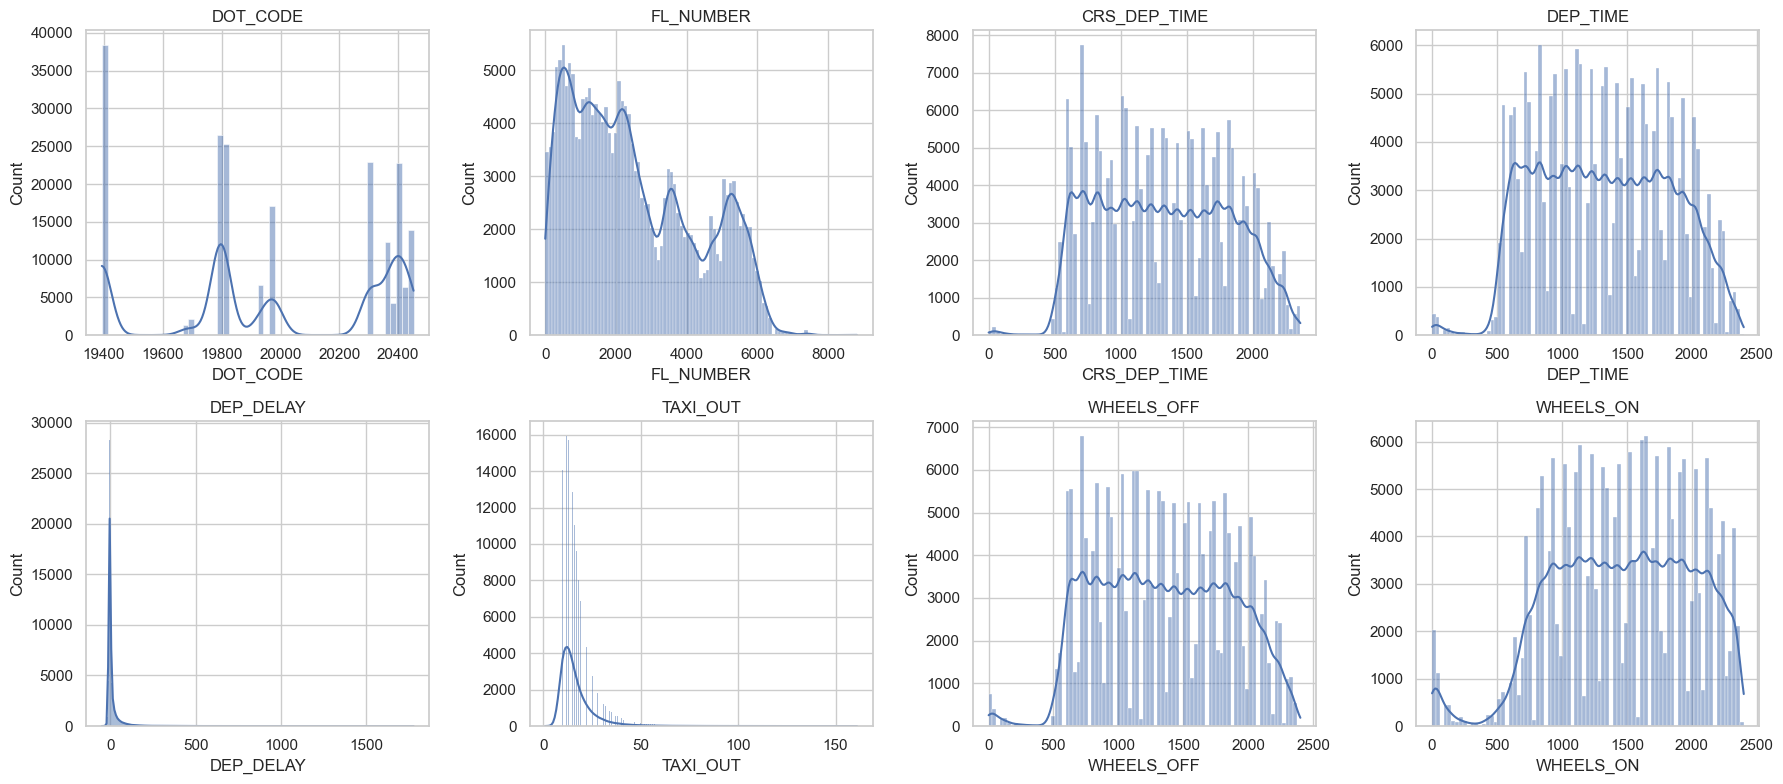

<Figure size 640x480 with 0 Axes>

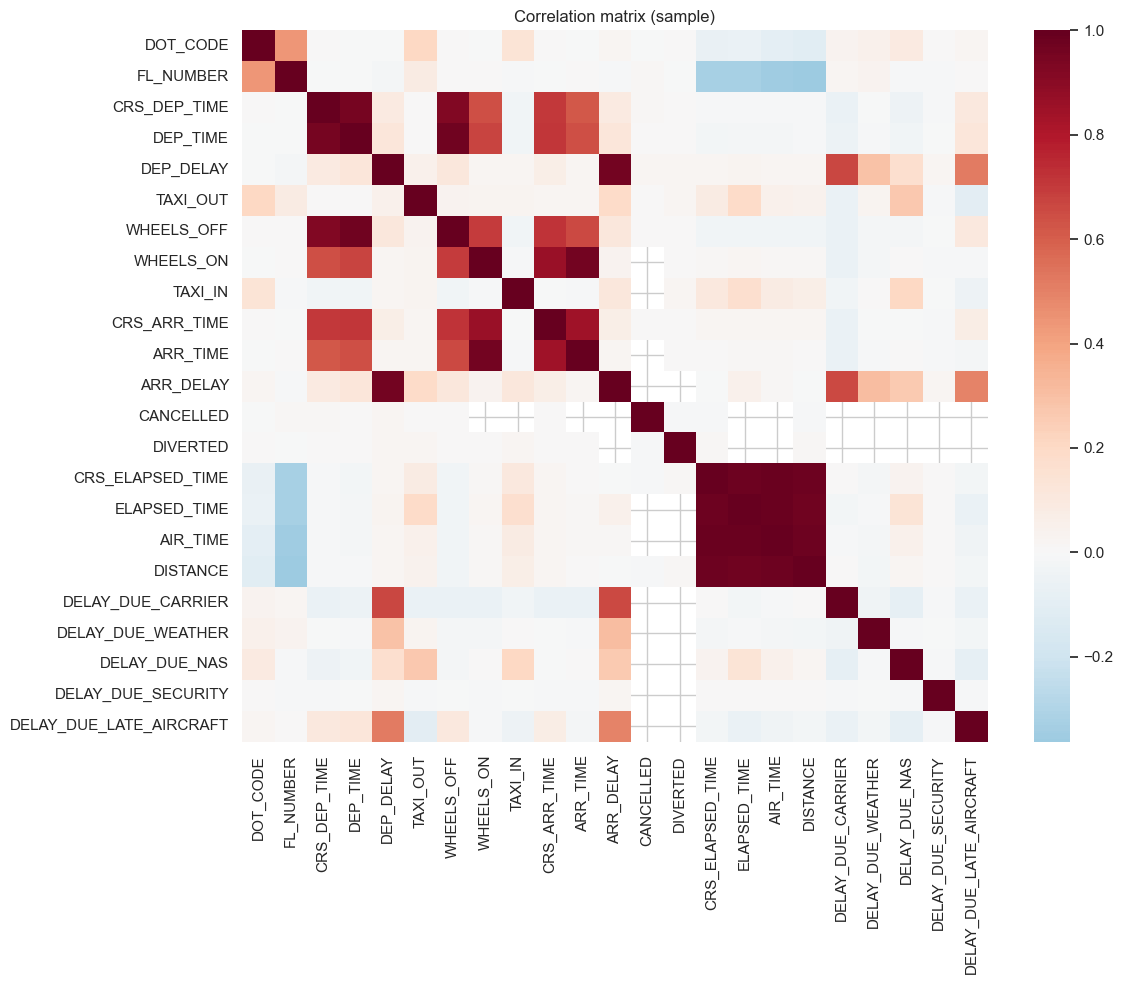

Detected date-like columns: ['FL_DATE', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'CRS_ELAPSED_TIME', 'ELAPSED_TIME', 'AIR_TIME']
Plots saved to eda_outputs/.


In [6]:
# Quick visual EDA sample runner
SAMPLE_N = 200_000  # set to None to load full dataset (may use a lot of memory)

print('Loading sample...')
if SAMPLE_N is None:
    df_sample = pd.read_csv(DATA_PATH)
else:
    # Fast sample by reading in chunks and concatenating random chunks until we hit the target sample size
    reader = pd.read_csv(DATA_PATH, chunksize=50000)
    pieces = []
    total = 0
    import random
    for chunk in reader:
        if total >= SAMPLE_N:
            break
        # sample rows from the chunk
        take = min(SAMPLE_N - total, int(len(chunk) * 0.4) or 1)
        pieces.append(chunk.sample(n=take, random_state=42))
        total += take
    df_sample = pd.concat(pieces, ignore_index=True)

print('Sample loaded, shape:', df_sample.shape)

# Ensure eda_outputs exists
os.makedirs('eda_outputs', exist_ok=True)

# Numeric histograms (top numeric columns)
num_cols = df_sample.select_dtypes(include=[np.number]).columns.tolist()
num_cols = [c for c in num_cols if df_sample[c].nunique()>1]
plot_num = num_cols[:8]
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 4, figsize=(18,8))
axes = axes.flatten()
for i, c in enumerate(plot_num):
    sns.histplot(df_sample[c].dropna(), ax=axes[i], kde=True)
    axes[i].set_title(c)
plt.tight_layout()
plt.show()
plt.savefig('eda_outputs/sample_numeric_histograms.png')

# Top categories for common categorical columns
cat_candidates = ['carrier','origin','dest','airline','tailnum']
found = [c for c in cat_candidates if c in df_sample.columns]
for c in found:
    vc = df_sample[c].value_counts().head(15)
    plt.figure(figsize=(8,4))
    sns.barplot(x=vc.values, y=vc.index)
    plt.title(f'Top values for {c}')
    plt.tight_layout()
    plt.show()
    plt.savefig(f'eda_outputs/sample_top_{c}.png')

# Top routes
if 'origin' in df_sample.columns and 'dest' in df_sample.columns:
    routes = df_sample.groupby(['origin','dest']).size().reset_index(name='count').sort_values('count', ascending=False).head(20)
    print('Top routes (sample):')
    display(routes)
    plt.figure(figsize=(10,5))
    sns.barplot(x='count', y=routes.apply(lambda r: f"{r['origin']}-{r['dest']}", axis=1), data=routes)
    plt.title('Top routes (sample)')
    plt.tight_layout()
    plt.savefig('eda_outputs/sample_top_routes.png')
    plt.show()

# Correlation heatmap for numeric columns (sample)
if len(num_cols) >= 2:
    corr = df_sample[num_cols].corr()
    plt.figure(figsize=(12,10))
    sns.heatmap(corr, cmap='RdBu_r', center=0)
    plt.title('Correlation matrix (sample)')
    plt.tight_layout()
    plt.savefig('eda_outputs/sample_corr.png')
    plt.show()

# Time-series delays if timestamp-like column exists
date_cols = [c for c in df_sample.columns if 'date' in c.lower() or 'time' in c.lower() or 'fl_date' in c.lower()]
print('Detected date-like columns:', date_cols)
if date_cols:
    dcol = date_cols[0]
    df_sample[dcol] = pd.to_datetime(df_sample[dcol], errors='coerce')
    if 'arr_delay' in df_sample.columns:
        ts = df_sample.set_index(dcol).resample('D')['arr_delay'].mean().dropna()
        if not ts.empty:
            plt.figure(figsize=(12,4))
            ts.plot()
            plt.title('Daily average arrival delay (sample)')
            plt.tight_layout()
            plt.savefig('eda_outputs/sample_daily_arr_delay.png')
            plt.show()

print('Plots saved to eda_outputs/.')


In [7]:
print(df.isnull().sum())

AIRLINE                          0
AIRLINE_DOT                      0
AIRLINE_CODE                     0
DOT_CODE                         0
FL_NUMBER                        0
ORIGIN                           0
ORIGIN_CITY                      0
DEST                             0
DEST_CITY                        0
CRS_DEP_TIME                     0
DEP_TIME                     77615
DEP_DELAY                    77644
TAXI_OUT                     78806
WHEELS_OFF                   78806
WHEELS_ON                    79944
TAXI_IN                      79944
CRS_ARR_TIME                     0
ARR_TIME                     79942
ARR_DELAY                    86198
CANCELLED                        0
CANCELLATION_CODE          2920860
DIVERTED                         0
CRS_ELAPSED_TIME                14
ELAPSED_TIME                 86198
AIR_TIME                     86198
DISTANCE                         0
DELAY_DUE_CARRIER          2466137
DELAY_DUE_WEATHER          2466137
DELAY_DUE_NAS       